In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
%matplotlib inline

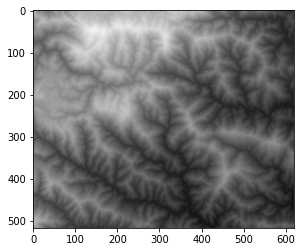

In [3]:
img = mpimg.imread('image.png')
plt.imshow(img)

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

def average(r, c, matrix, amt=1):
    r1 = 0 if r-amt < 0 else r-amt
    c1 = 0 if c-amt < 0 else c-amt 
    row_m = np.mean(matrix[r1:(r+amt+1),c])
    col_m = np.mean(matrix[r, c1:(c+amt+1)])
    return np.mean([row_m, col_m])

g_img = rgb2gray(img).copy()

def iterate_(n=1):
    for row_i, row in enumerate(g_img):
        for col_i, _ in enumerate(row):
            g_img[row_i, col_i] = np.log(g_img[row_i, col_i])
            g_img[row_i, col_i] = average(row_i, col_i, g_img, n)

iterate_(5)

x = np.linspace(len(g_img[0]),0,len(g_img[0]))
y = np.linspace(0,len(g_img),len(g_img))
X, Y = np.meshgrid(x, y)

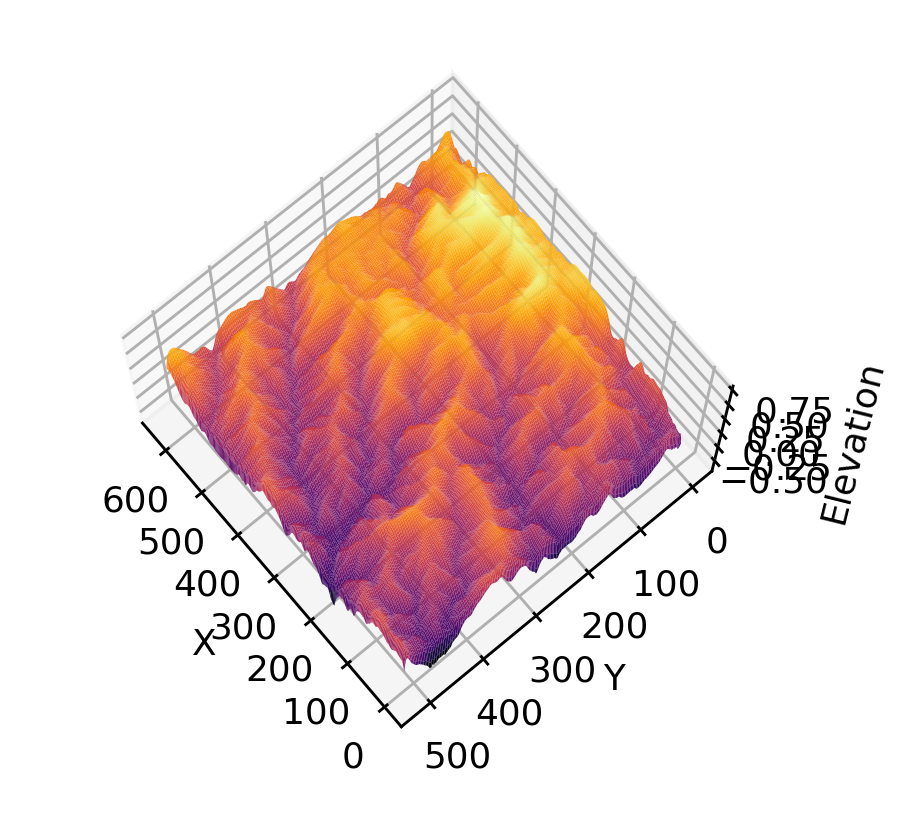

In [5]:
fig = plt.figure(dpi=len(img)/2)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface \
(X, Y, g_img, cmap='inferno', linewidth=1,
antialiased=True, alpha=1, rstride=3, cstride=3,)
# Labels.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation')
ax.elev = 74
ax.dist = 12
ax.azim = 140